# Homework 1: Applied Machine Learning Assignment

This assignment covers contents of the first three lectures.

We will be focusing on topics related to
1. Data Visualization and Analysis
2. Supervised Learning - Linear Regression, Logistic Regression, and SVM with Data Preprocessing.

### **Due Date is October 3, 11:59 PM.** 

## Name: Ryan McNamara
## UNI: rjm2232

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

# Task 1: Data Visualization and Analysis

"Now that's A LOT of data. Can you show me something I can understand?"

This question often arises when we see datasets with thousands of rows and want to understand the characteristics of data. 

Data visualization comes to our rescue!

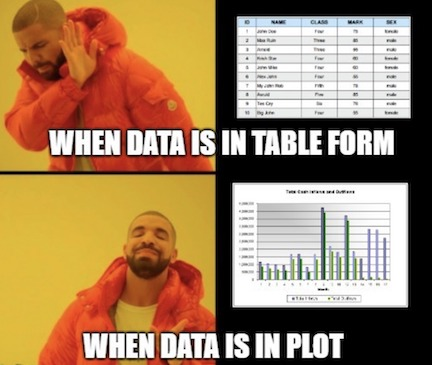


### We are going to use the credit-dataset for Task 1. 

**1.1 Plot the distribution of the features - credit_amount, age, and duration using a histogram.
Make sure to label your axes while plotting. [6 points]**



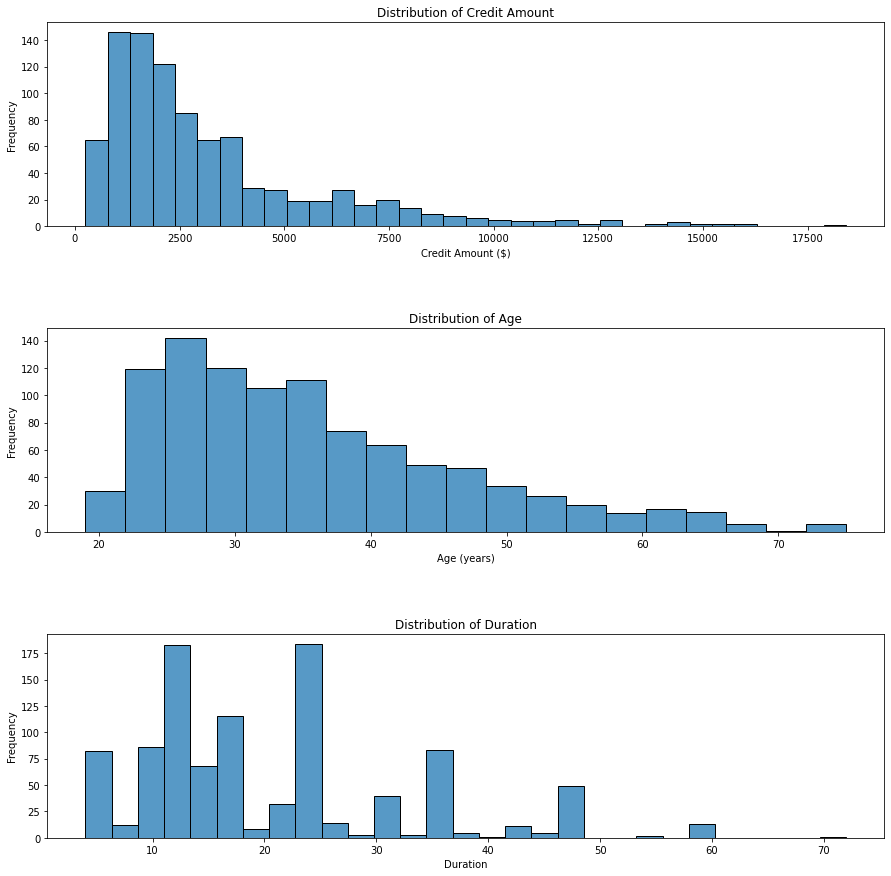

In [4]:
# load data 
credit_data = pd.read_csv('dataset_credit.csv')

# create subplots and adjust horizontal space between subplots 
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (15, 15))
fig.subplots_adjust(hspace = 0.5)

# plot credit_amount histogram 
sns.histplot(credit_data['credit_amount'], ax = ax[0])

# set x label, y label, and title for credit_amount histogram
ax[0].set_xlabel('Credit Amount ($)')
ax[0].set_ylabel('Frequency') 
ax[0].set_title('Distribution of Credit Amount')

# plot age histogram 
sns.histplot(credit_data['age'], ax = ax[1])

# set x label, y label, and title for age histogram 
ax[1].set_xlabel('Age (years)') 
ax[1].set_ylabel('Frequency') 
ax[1].set_title('Distribution of Age')

# plot duration histogram 
sns.histplot(credit_data['duration'], ax = ax[2])

# set x label, y label, and title for duration histogram
ax[2].set_xlabel('Duration')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Distribution of Duration')

# show figure
plt.show()

**1.2 Plot the relationships between the features - class and credit_amount using box plots. Make sure to label the axes[4 points]**



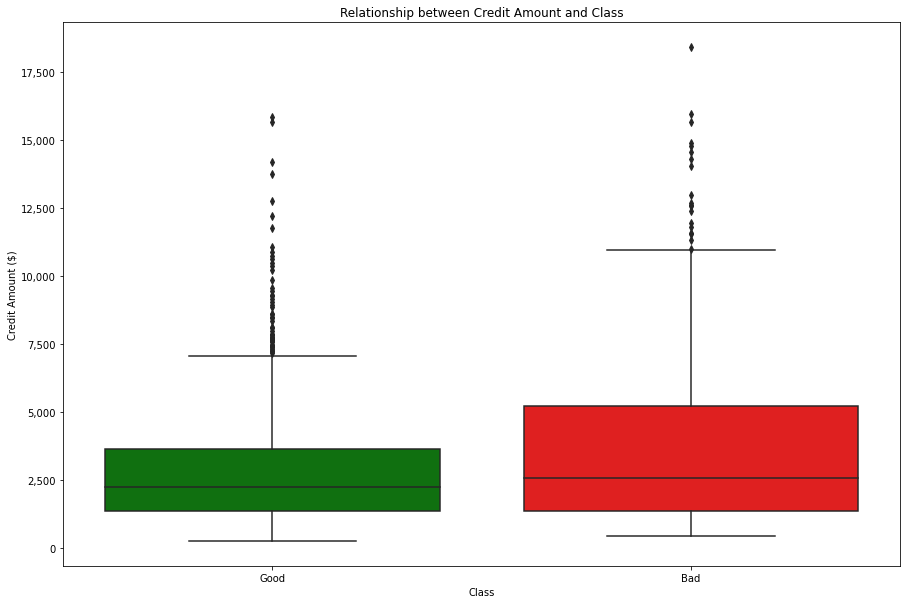

In [5]:
# create figure 
fig = plt.figure(figsize = (15, 10))

# get current axes 
ax = fig.gca()

# plot boxplot
sns.boxplot(data = credit_data, x = 'class', y = 'credit_amount', palette = ['green', 'red'])

# set x label, y label, and title
plt.xlabel('Class')
plt.ylabel('Credit Amount ($)')
plt.title('Relationship between Credit Amount and Class')

# change labels of the x tick marks 
plt.xticks(ticks = [0, 1], labels = ['Good', 'Bad'])

# add commas in the numbers on the y axis 
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# show figure 
plt.show()

**1.3 Plot the distribution of label 'class' using a pie chart. Be sure to label correctly. What do you infer about the data and its distribution from all the plots? (1.1, 1.2, and 1.3)[5 points]**

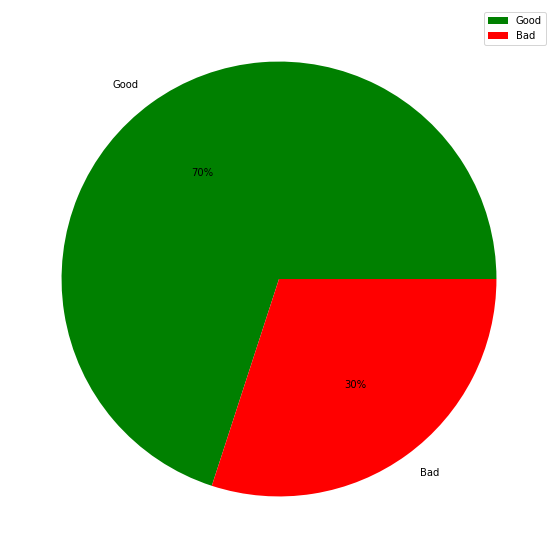

In [6]:
# create figure 
fig = plt.figure(figsize = (15, 10))

# get value counts for the class column
counts = credit_data['class'].value_counts()

# create dictionary mapping for the labels
labels = {
    'Good': 'good', 
    'Bad': 'bad'
}

# create dictionary mapping for the colors 
colors = {
    'green': 'good', 
    'red': 'bad'
}

# plot pie chart
plt.pie(counts, labels = labels, colors = colors, autopct = "%.0f%%")
plt.legend()

# show figure 
plt.show()

From the histogram plots, we see that the 'credit_amount' and 'age' features are right-skewed, meaning there a majority of the data is located on the lower end of the histogram and there is an extended right tail. The distribution of "duration" appears very scattered. There are a few values where there is high frequency, such as in the early 10s (10 - 14) and the early 20s (20 - 24). 
The median 'credit_amount' for the 'good' and 'bad' classes are relatively similar, however, there 'bad' class has a higher 75th percentile than the 'good' class. 
The dataset appears slightly unbalanced when looking at the pie chart above. Only 30% of the labels are 'bad' while 70% of the labels are 'good'. 
We can infer that higher credit amounts are allotted for people that are older. We can also infer that while not all high credit amounts are bad, the probability of a credit amount being bad increases with the credit amount. There also appears to be specific durations that are more common than others, as mentioned before, as the distribution is not smooth. 

# Task 2 : Linear Models for Regression and Classification

In this notebook, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

## Part 1: Linear Regression

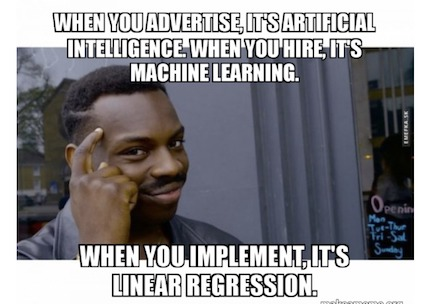

In part 1, we will use two datasets - synthetic and auto-mpg to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:

$ 𝜖 ∼ Normal(0,3) $

$ y = 5𝑥 + 10 + 𝜖 $

In [7]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
# y = np.linspace(0, 5, 100)
y = 5 * x + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.1 Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?[2 points]**

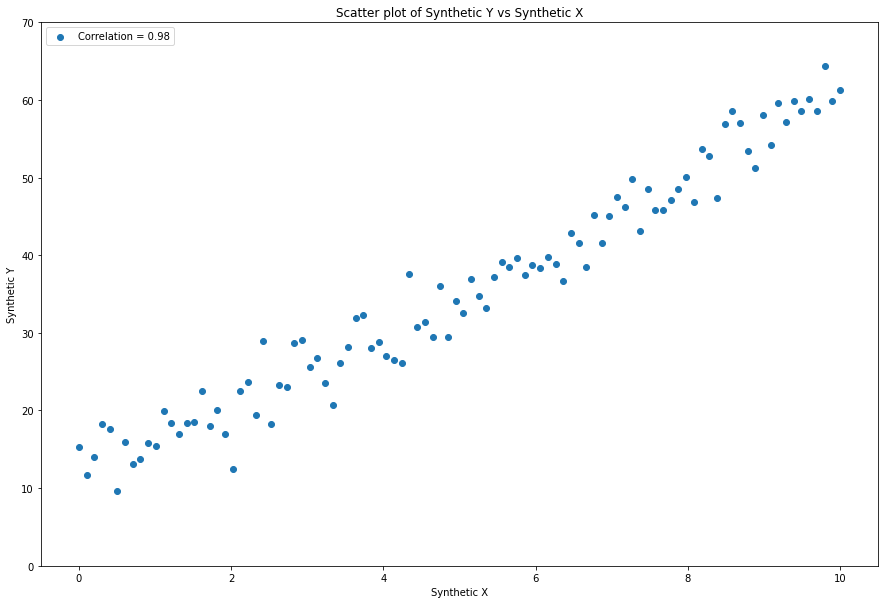

In [8]:
# create figure 
fig = plt.figure(figsize = (15, 10))

# plot scatter plot
plt.scatter(x, y, label = f'Correlation = {np.round(np.corrcoef(x, y)[0,1], 2)}')

# change x and y ticks 
plt.yticks(ticks = range(0, 80, 10))
plt.xticks(ticks = range(0, 12, 2))

# set x label, y label, and title
plt.xlabel('Synthetic X')
plt.ylabel('Synthetic Y')
plt.title('Scatter plot of Synthetic Y vs Synthetic X')

# add legend to upper left 
plt.legend(loc = 'upper left')

# show figure
plt.show()

From the scatterplot above, it appears that the features have a linear relationship. There is a strong linear, positive correlation between X and Y. From the plot, we see that Y is directly proportional to X. This means that as X increases, so does Y. 
The X values are also independent, meaning they do not depend on each other. 
Looking at the scatter plot, we can also make the assumption that the errors and the y values both have close to constant variance, meaning the data has homoscedasticity. 
Lastly, it appears that the errors follow a normal distribution, with many of the errors being relatively small if we were to fit a linear regression line. 
Thus, this dataset is a good candidate for a linear regression model. 

The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [9]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**2.1.2 Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.[4 points]**

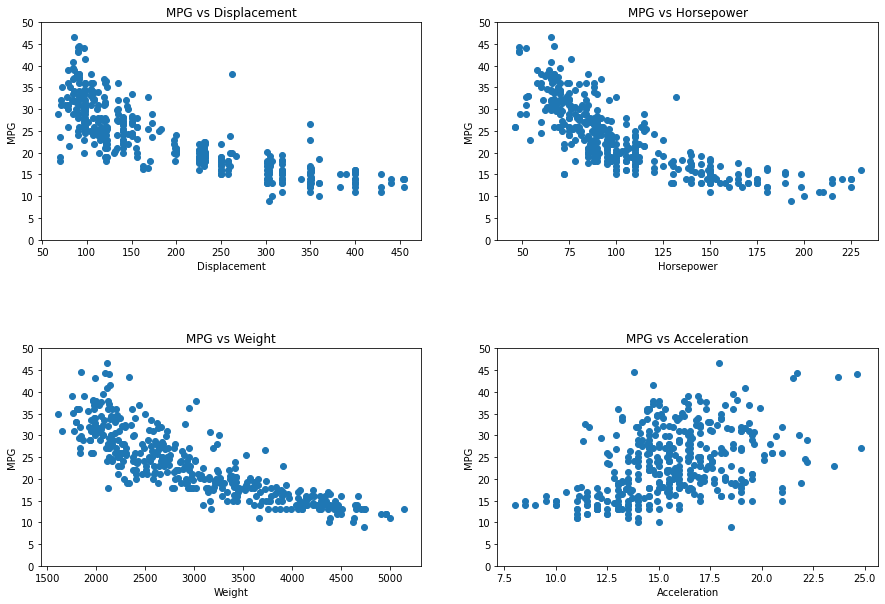

In [11]:
# create subplots and adjust horizontal space between subplots 
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (15, 10))
fig.subplots_adjust(hspace = 0.5)

# plot scatter plot of MPG vs displacement 
ax[0, 0].scatter(auto_mpg_X['displacement'], auto_mpg_y)

# set x label, y label, and title of MPG vs displacement 
ax[0, 0].set_xlabel('Displacement')
ax[0, 0].set_ylabel('MPG')
ax[0, 0].set_title('MPG vs Displacement')

# set y ticks 
ax[0, 0].set_yticks(ticks = range(0, 55, 5))

# plot scatter plot of MPG vs horsepower
ax[0, 1].scatter(auto_mpg_X['horsepower'], auto_mpg_y)

# set x label, y label, and title of MPG vs horsepower
ax[0, 1].set_xlabel('Horsepower')
ax[0, 1].set_ylabel('MPG')
ax[0, 1].set_title('MPG vs Horsepower')

# set y ticks
ax[0, 1].set_yticks(ticks = range(0, 55, 5))

# plot scatter plot of MPG vs weight
ax[1, 0].scatter(auto_mpg_X['weight'], auto_mpg_y)

# set x label, y label, and title of MPG vs weight
ax[1, 0].set_xlabel('Weight')
ax[1, 0].set_ylabel('MPG')
ax[1, 0].set_title('MPG vs Weight')

# set y ticks
ax[1, 0].set_yticks(ticks = range(0, 55, 5))

# plot scatter plot of MPG vs acceleration 
ax[1, 1].scatter(auto_mpg_X['acceleration'], auto_mpg_y)

# set x label, y label, and title of MPG vs acceleration 
ax[1, 1].set_xlabel('Acceleration')
ax[1, 1].set_ylabel('MPG')
ax[1, 1].set_title('MPG vs Acceleration')

# set y ticks
ax[1, 1].set_yticks(ticks = range(0, 55, 5))

# show figure 
plt.show()

**2.1.3 Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.[3 points]**

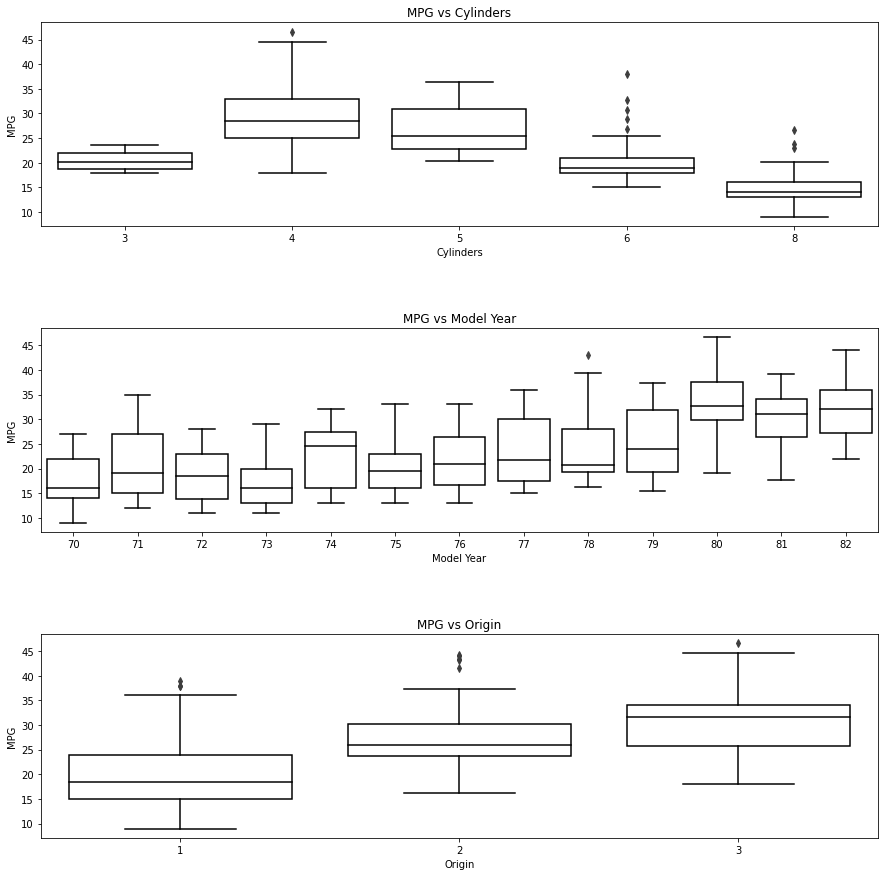

In [12]:
# create subplots and adjust the horizontal space between subplots 
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (15, 15))
fig.subplots_adjust(hspace = 0.5)

# plot boxplot of MPG vs cylinders 
sns.boxplot(x = auto_mpg_X['cylinders'], y = auto_mpg_y, ax = ax[0])

# set x label, y label, and title of MPG vs cylinders 
ax[0].set_xlabel('Cylinders')
ax[0].set_ylabel('MPG')
ax[0].set_title('MPG vs Cylinders')

# plot boxplot of MPG vs Model Year 
sns.boxplot(x = auto_mpg_X['model year'], y = auto_mpg_y, ax = ax[1])

# set x label, y label, and title of MPG vs Model Year
ax[1].set_xlabel('Model Year')
ax[1].set_ylabel('MPG')
ax[1].set_title('MPG vs Model Year')

# plot boxplot of MPG vs origin
sns.boxplot(x = auto_mpg_X['origin'], y = auto_mpg_y, ax = ax[2])

# set x label, y label, and title of MPG vs origin 
ax[2].set_xlabel('Origin') 
ax[2].set_ylabel('MPG')
ax[2].set_title('MPG vs Origin')

# loop over all of the boxplot outline and make them black 
for i in range(0, 3): 
    for j, box in enumerate(ax[i].artists):
        box.set_edgecolor('black')
        box.set_facecolor('white')
    
        for k in range(6 * j,6 * (j + 1)):
            ax[i].lines[k].set_color('black')


**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.[2 points]**

I believe that linear regression is an okay model for the problem, however, I believe that a quadratic or higher dimensional model would be much better. All of the continuous features of the data (i.e. 'acceleration', 'horsepower', 'weight', and 'displacement') appear to have a quadratic relationship with 'mpg'. None of these features show a strong linear relationship. 
'model year' and 'origin' both appear to have a linear relationship with 'mpg', however, 'cylinders' does not. The plot for 'mpg' vs 'cylinders' appears quadratic. 
There is likely not complete independence of all of the features. For example, there is likely some correlation between 'weight' and 'acceleration', as heavier vehicles usually cannot accelerate as fast as lighter vehicles. 
Looking at the scatterplots, we likely do not have complete homoscedasticity and normality. The scatter plots appear quadratic, and thus the error doesn't seem to be normally distributed if we draw a linear regression line. The y values and errors also don't appear to have constant variance, which can be seen from the boxplots. 
While some of the variables above show a weak linear relationship with 'mpg', I would argue that the relationships are more strongly quadratic. Thus, while a linear regression model might perform okay on the problem, I believe a higher dimensional model would be ideal for this dataset. 

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:


In [13]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.25, random_state = 0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [38.44273829 19.38966655 26.79105322 30.69326568 45.00432104]


**2.1.5 Apply the same processing steps on the auto MPG dataset.[3 points]**

In [14]:
# split dataset into training, validation, and test sets 
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size = 0.2, random_state = 0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size = 0.25, random_state = 0)

# standardize the columns in the feature matrices 
scaler = StandardScaler() 
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)

# add a column of ones to the feature matrices 
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.6 Implement a `LinearRegression` class with two methods: `train` and `predict`.[8 points]**
You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [15]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        self.w = np.dot(np.linalg.inv(np.dot(X.T, X) + np.dot(self.alpha, np.eye(X.shape[1]))), np.dot(X.T, y))
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        y_pred = np.dot(X, self.w)
        return y_pred
        

### Train,  Evaluate, and Interpret Linear Regression Model

**2.1.7 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.[3 points]**

In [16]:
# create linear regression model with alpha = 0
lin_reg = LinearRegression(alpha = 0)

# train the model on X_train and y_train
lin_reg.train(X_train, y_train)

# predict the y value for X_test 
y_pred = lin_reg.predict(X_test)

# define a list of indexes we want to extract 
indexes = [0, 1, 2, -3, -2, -1]

# print out the predictions and actual labels 
print('Predictions:', y_pred[indexes])
print('Actual Labels:', y_test[indexes])

Predictions: [23.29684501 53.01355017 11.41016295 22.30628817 26.76379395 14.38183346]
Actual Labels: [23.26858868 56.97068215 13.94631496 28.93047599 20.72427726 13.73074749]


**2.1.8 Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.[2 points]** If your line goes through the data points, you have likely implemented the linear regression correctly!

Text(0, 0.5, 'y_test')

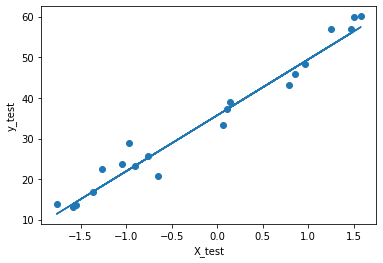

In [17]:
# plot scatter plot of y_test vs X_test 
plt.scatter(x = X_test[:, 1], y = y_test)

# use the weights of the model to get the predicted y values 
y_check = X_test[:, 1] * lin_reg.w[1] + lin_reg.w[0]

# plot the predicted y values vs the X values 
plt.plot(X_test[:, 1], y_check)

# set the x label and y label 
plt.xlabel('X_test')
plt.ylabel('y_test')

**2.1.9 Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.[4 points]**

In [18]:
from sklearn.metrics import mean_squared_error

# create linear regression model with alpha = 0
lin_reg = LinearRegression(alpha = 0)

# train the model on auto_mpg_X_train and auto_mpg_y_train
lin_reg.train(auto_mpg_X_train, auto_mpg_y_train)

# use the model to predict the y values for the training, validation, and test sets 
auto_mpg_y_pred_train = lin_reg.predict(auto_mpg_X_train)
auto_mpg_y_pred_val = lin_reg.predict(auto_mpg_X_val)
auto_mpg_y_pred_test = lin_reg.predict(auto_mpg_X_test)

# define function to calculate the mean-squared error 
def mse(y_true, y_pred): 
    return np.mean((y_true - y_pred) ** 2)

# print the mean-squared error on the training, validation, and test sets 
print('The mean-squared error on auto_mpg_y_train is:', mse(auto_mpg_y_train, auto_mpg_y_pred_train))
print('The mean-squared error on auto_mpg_y_val is:', mse(auto_mpg_y_val, auto_mpg_y_pred_val))
print('The mean-squared error on auto_mpg_y_test is:', mse(auto_mpg_y_test, auto_mpg_y_pred_test))

print()

# define a list of indexes we want to extract 
indexes = [0, 1, 2, -3, -2, -1]

# print the predictions on the test set and the actual labels of the test set 
print('Predictions on test set:', auto_mpg_y_pred_test[indexes])
print('Actual labels of test set:', np.array(auto_mpg_y_test)[indexes])

The mean-squared error on auto_mpg_y_train is: 10.670584193330882
The mean-squared error on auto_mpg_y_val is: 12.94479874878271
The mean-squared error on auto_mpg_y_test is: 10.881879498129658

Predictions on test set: [26.3546854  25.49133646 10.15877236 26.85946741 21.85952894 32.03222623]
Actual labels of test set: [28.  22.3 12.  26.  19.2 31.5]


**2.1.10 As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. [3 points]** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [19]:
# calculate the mean of the auto_mpg_y_train set 
auto_mpg_y_train_mean = np.mean(auto_mpg_y_train)

# calculate the baseline mean-squared error on the training, validation, and test sets 
mse_mpg_y_train = mse(auto_mpg_y_train, [auto_mpg_y_train_mean] * len(auto_mpg_y_train))
mse_mpg_y_val = mse(auto_mpg_y_val, [auto_mpg_y_train_mean] * len(auto_mpg_y_val))
mse_mpg_y_test = mse(auto_mpg_y_test, [auto_mpg_y_train_mean] * len(auto_mpg_y_test))

# print the mean-squared error on the training, validation, and test sets
print('The baseline mean-squared error on auto_mpg_y_train is:', mse_mpg_y_train)
print('The baseline mean-squared error on auto_mpg_y_val is:', mse_mpg_y_val)
print('The baseline mean-squared error on auto_mpg_y_test is:', mse_mpg_y_test)

The baseline mean-squared error on auto_mpg_y_train is: 60.56461465410184
The baseline mean-squared error on auto_mpg_y_val is: 60.47988929483249
The baseline mean-squared error on auto_mpg_y_test is: 62.4616051879408


**2.1.11 Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. [3 points]** Make sure to label the bars (x-axis) and don't forget the bias term!

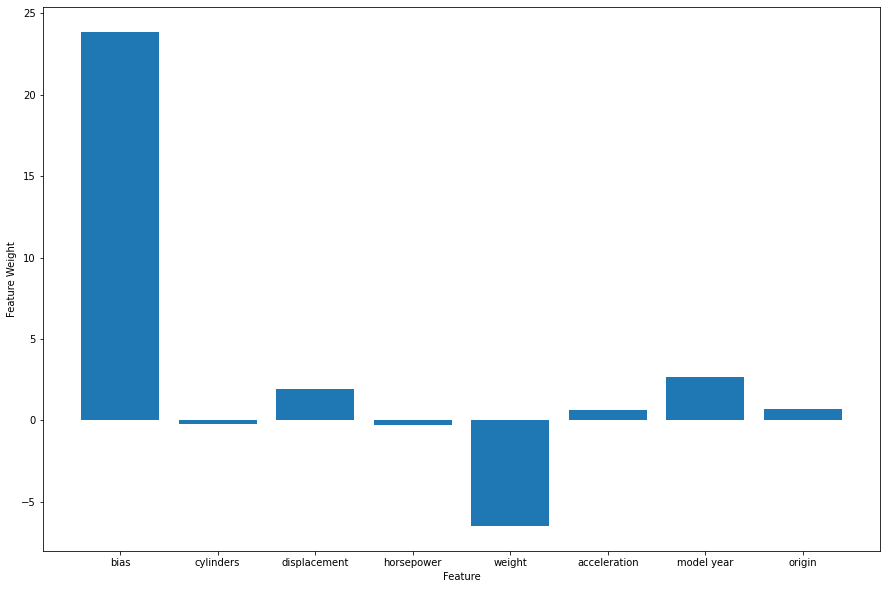

In [20]:
# create figure 
fig = plt.figure(figsize = (15, 10))

# get the feature names of auto_mpg_X and add 'bias' to the beginning of the list 
col_names = list(auto_mpg_X.columns)
col_names.insert(0, 'bias')

# plot bar plot of the weights vs the features 
plt.bar(x = range(0, len(lin_reg.w)), height = lin_reg.w)

# set the x and y labels 
plt.xlabel('Feature')
plt.ylabel('Feature Weight')

# set the x ticks as the feature names 
plt.xticks(ticks = range(0, len(lin_reg.w)), labels = col_names)

# show the figure 
plt.show()

**2.1.12 According to your model, which features are the greatest contributors to the MPG?[2 points]**

According to the model and the plot above, the greatest contributors to the 'mpg' are the 'bias', 'displacement', 'model year', and 'weight' features. 'bias', 'displacement', and 'model year' have positive weight values, meaning that they contribute positively to the 'mpg'. This makes sense because we would that cars with higher displacement would get better mileage and we expect that cars that were made more recently would get better mileage than cars that were made a long time ago. We also expect that cars with a higher weight would get a lower MPG than lighter cars. 
We also see that 'acceleration' and 'origin' contribute slightly to the 'mpg' predictions, but 'cylinders' and 'horsepower' do not contribute much at all. 

### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**2.1.13 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.[4 points]**

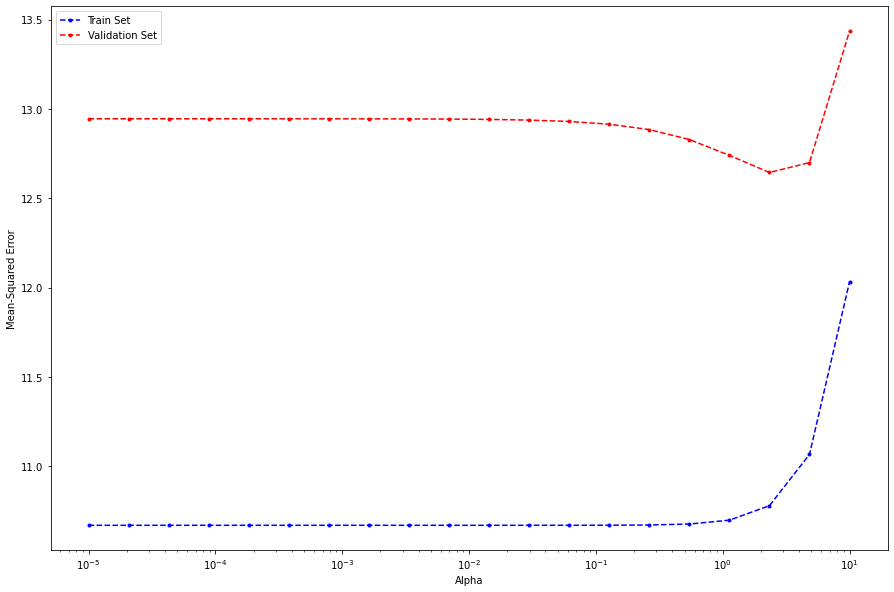

In [21]:
# define alphas we want to search over 
alphas = np.logspace(-5, 1, 20)

# initialize empty lists for the train and validation mean-squared errors 
train_mse = []
val_mse = []

# for each alpha, train a model and record the mean-squared error on the training and validation sets 
for idx in alphas: 
    model = LinearRegression(alpha = idx)
    model.train(auto_mpg_X_train, auto_mpg_y_train)
    
    auto_mpg_y_pred_train = model.predict(auto_mpg_X_train)
    train_mse.append(mse(auto_mpg_y_train, auto_mpg_y_pred_train))
    
    auto_mpg_y_pred_val = model.predict(auto_mpg_X_val)
    val_mse.append(mse(auto_mpg_y_val, auto_mpg_y_pred_val))
    
# create figure 
fig = plt.figure(figsize = (15, 10))

# plot the mean-squared error vs alpha for the training and validation sets 
plt.plot(alphas, train_mse, 'b.--', label = 'Train Set')
plt.plot(alphas, val_mse, 'r.--', label = 'Validation Set')

# add legend
plt.legend()

# set the x and y labels 
plt.xlabel('Alpha')
plt.ylabel('Mean-Squared Error')

# change x scale to log
plt.xscale('log')

**2.1.14 Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?[ 2 points]**

With a very high model complexity (low alpha), we see that the mean-squared error on the training set is low, while the mean-squared error on the validation set is higher. This is likely the cause of overfitting, because the model is too complex and is overfitting on the training data and not performing as well on the unseen validation data. As alpha increases, and the model complexity decreases, we begin to see the mean-squared error on the training data increase and the mean-squared error on the validation data decrease. This is the point that we are after, where the separation betweeen the mean-squared error on the training set and validation set is minimized (while both sets still have a low mean-squared error). Once we reach too large of an alpha (i.e. too low model complexity), we see the mean-squared error on the validation set begin to climb again. This is an indicator of underfitting. At this point, the model is performing worse on both datasets because the model is too simple. 

## Part 2: Logistic Regression

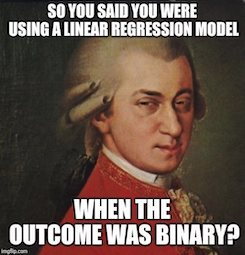






**In this part we would use Logistic Regression on NBA rookie stats to predict if player will last 5 years in league**

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5


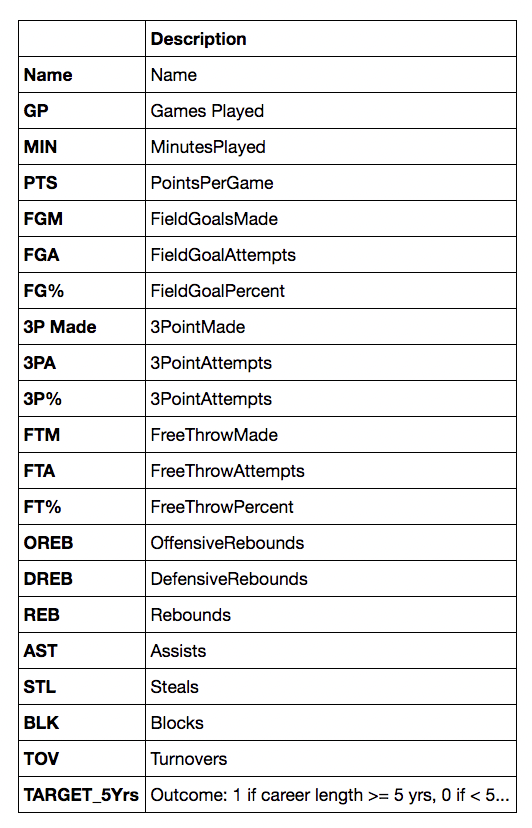

In [22]:
nba_reg = pd.read_csv("nba_logreg.csv")
nba_reg.head()
nba_reg.shape

(1340, 21)

#### Missing Value analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)
(Note: Name your dataset as nba_reg_new after removing NAs) [2 points]**

In [23]:
# set options to view the whole dataset 
pd.set_option('display.max_rows', 2000)
# print(nba_reg)

# get the counts of how many missing values are in each column 
missing_vals = np.sum(nba_reg.isnull())
print(missing_vals)

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


Since there are only 11 missing values in the '3P%' column, we can remove the rows that have missing values in that column. We will still be left with 1,329 samples, which is not a lot different from 1,340 samples, so it is okay to remove these rows. 

In [24]:
# remove the missing values from the '3P%' column
nba_reg_new = nba_reg[~nba_reg['3P%'].isnull()]

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.[3 points]**

In [25]:
# get the percentage of each label
y_probs = nba_reg_new['TARGET_5Yrs'].value_counts() / nba_reg_new.shape[0]
print(y_probs)

1.0    0.62152
0.0    0.37848
Name: TARGET_5Yrs, dtype: float64


I believe that the data is slightly unbalanced, but not enough to cause major concern. I looked online and saw that a good indicator of an unbalanced dataset is a 3:1 or 4:1 ratio of the labels. In our case, we have less than a 2:1 ratio of positive to negative labels. 
Although almost every dataset is technically "unbalanced," I don't believe that this dataset should be classified as unbalanced in the context of machine learning. 

In [26]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']
print(nba_X.shape)

(1329, 20)


**2.2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?[4 points]**

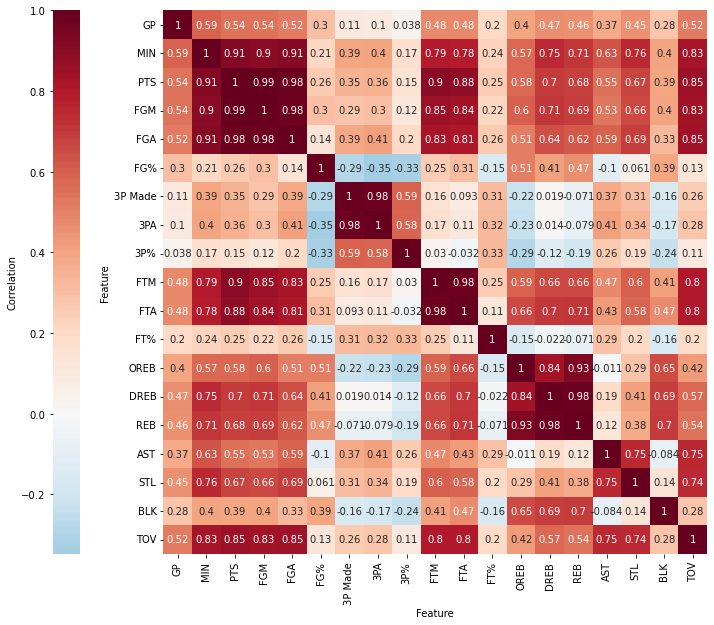

In [27]:
# create figure 
fig = plt.figure(figsize = (15, 10))

# get the correlation matrix of nba_X
correlations = nba_X.corr()

# plot heatmap 
sns.heatmap(correlations, cmap = 'RdBu_r', center = 0, annot = True, square = True, cbar_kws = {'location': 'left', 'label': 'Correlation'})

# set x and y label 
plt.xlabel('Feature')
plt.ylabel('Feature')

# show figure 
plt.show()

# get absolute values of the correlations
correlations_abs = nba_X.corr().abs()

# extract the upper triangle 
upper_tri = correlations_abs.where(np.triu(np.ones(correlations_abs.shape),k=1).astype(bool))

# get the features that are highly correlated (>= 0.9)
drop_cols = [col for col in upper_tri.columns if any(upper_tri[col] >= 0.9)]

# drop the features 
nba_X_dropped_cols = nba_X.drop(drop_cols, axis = 1)

It is necessary to drop these columns before proceeding further because we want to avoid multicolinearity. Since these features are highly correlated, they provide no additional information in the model. Thus, including them would mean having no significant difference in performance (it may even harm performance) despite having an increase in model complexity. We should follow the logic of Occam's razor: with no significant increase in performance, simpler models are preferred. Thus, we remove the highly correlated features, only leaving enough features to actual capture the nature of the data. 

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [28]:
# Split data into features and labels
nba_new_X = nba_X_dropped_cols.drop(columns = 'Name', axis = 1)
nba_new_Y = nba_y
print(nba_new_X.columns)

Index(['GP', 'MIN', 'FG%', '3P Made', '3P%', 'FTM', 'FT%', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')


**2.2.4 Apply the following pre-processing steps:[5 points]**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [29]:
# convert series to a numpy array 
nba_new_Y = nba_new_Y.to_numpy().reshape((nba_new_Y.shape[0], 1))

# split dataset into training, validation, and test sets 
nba_new_X_dev, nba_new_X_test, nba_new_Y_dev, nba_new_Y_test = train_test_split(nba_new_X, nba_new_Y, test_size = 0.2, random_state = 0)
nba_new_X_train, nba_new_X_val, nba_new_Y_train, nba_new_Y_val = train_test_split(nba_new_X_dev, nba_new_Y_dev, test_size = 0.25, random_state = 0)

# standardize the columns of the feature matrix 
scaler = StandardScaler()
nba_new_X_train = scaler.fit_transform(nba_new_X_train)
nba_new_X_val = scaler.transform(nba_new_X_val)
nba_new_X_test = scaler.transform(nba_new_X_test)

# add column of ones to the feature matrices of train, validation, and test datasets 
nba_new_X_train = np.hstack([np.ones((nba_new_X_train.shape[0], 1)), nba_new_X_train])
nba_new_X_val = np.hstack([np.ones((nba_new_X_val.shape[0], 1)), nba_new_X_val])
nba_new_X_test = np.hstack([np.ones((nba_new_X_test.shape[0], 1)), nba_new_X_test])

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [30]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.[6 points]**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.[2 points] 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)[ 3 points]**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.[1 point]

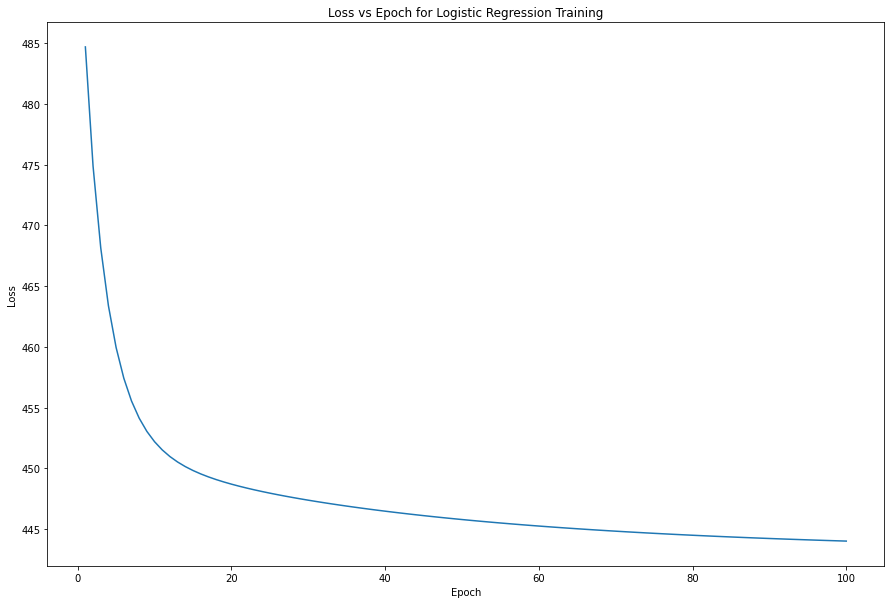

In [31]:
# create logistic regression model with alpha = 0, t = 100, and eta = 1e-3
log_reg = LogisticRegression(alpha = 0, t = 100, eta = 1e-3)

# train the model and save the loss values 
loss_vals = log_reg.train(nba_new_X_train, nba_new_Y_train)

# squeeze the loss values 
for idx in range(len(loss_vals)): 
    loss_vals[idx] = loss_vals[idx].squeeze()
    
# create figure 
fig = plt.figure(figsize = (15, 10))

# plot loss values vs epoch
plt.plot(range(1, 101), loss_vals)

# set x and y label and the title 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for Logistic Regression Training')

# show the figure 
plt.show()

In [32]:
# set seed 
np.random.seed(76)

# initialize lists for the hyperparameters and accuracies 
alphas_list = []
etas_list = []
ts_list = []
accuracy_list = []

# get random values for the hyperparameters and append them to the lists 
# train the model with the hyperparameters 
# predict and record the accuracy 

# I wasn't sure if we were allowed to import other functions for this purpose, however, I think it is helpful to do it 
# myself to understand how it is working
for i in range(20): 
    alpha = np.random.random(1)
    eta = np.random.random(1) / 1000
    t = np.random.randint(0, 101)
    
    alphas_list.append(alpha)
    etas_list.append(eta)
    ts_list.append(t)
    
    log_reg = LogisticRegression(alpha = alpha, eta = eta, t = t)
    
    loss = log_reg.train(nba_new_X_train, nba_new_Y_train)
    
    nba_new_Y_val_pred = log_reg.predict(nba_new_X_val)
    
    accuracy_list.append(accuracy_score(nba_new_Y_val, nba_new_Y_val_pred))

# get the index of the largest accuracy score 
ind = np.argmax(accuracy_list)

# print the max accuracy and the best hyperparameters 
print('The max accuracy on the validation set is:', accuracy_list[ind])
print('This is achieved with the following hyperparamters:')
print('\t- alpha =', np.squeeze(alphas_list[ind]))
print('\t- t =', ts_list[ind])
print('\t- eta = ', np.squeeze(etas_list[ind]))

# I wasn't sure if we were supposed to retrain the model on all of the dev set and then test on the test set, but that 
# is what I did. Technically, as the professor said, this would be the way to actual test your model. 

# resplit the dataset into dev and test sets 
nba_new_X_dev, nba_new_X_test, nba_new_Y_dev, nba_new_Y_test = train_test_split(nba_new_X, nba_new_Y, test_size = 0.2, random_state = 0)
# scale the features 
scaler = StandardScaler()
nba_new_X_dev = scaler.fit_transform(nba_new_X_dev)
nba_new_X_test = scaler.transform(nba_new_X_test)

# add a column of ones to the feature matrices 
nba_new_X_dev = np.hstack([np.ones((nba_new_X_dev.shape[0], 1)), nba_new_X_dev])
nba_new_X_test = np.hstack([np.ones((nba_new_X_test.shape[0], 1)), nba_new_X_test])

# define two logistic regression models with the hyperparameters above 
log_reg_1 = LogisticRegression(alpha = 0, t = 100, eta = 1e-3)
log_reg_2 = LogisticRegression(alpha = np.squeeze(alphas_list[ind]), t = ts_list[ind], eta = np.squeeze(etas_list[ind]))

# train the two models 
loss_1 = log_reg_1.train(nba_new_X_dev, nba_new_Y_dev)
loss_2 = log_reg_2.train(nba_new_X_dev, nba_new_Y_dev)

# predict using the two models 
nba_new_Y_test_pred_1 = log_reg_1.predict(nba_new_X_test)
nba_new_Y_test_pred_2 = log_reg_2.predict(nba_new_X_test)

# calculate the accuracy scores 
nba_new_Y_test_acc_1 = accuracy_score(nba_new_Y_test, nba_new_Y_test_pred_1)
nba_new_Y_test_acc_2 = accuracy_score(nba_new_Y_test, nba_new_Y_test_pred_2)

# print the accuracy scores 
print()
print('The accuracy on the test set with alpha = 0, t = 100, and eta = 1e-3 is:', nba_new_Y_test_acc_1)
print('The accuracy on the test set with alpha =', np.squeeze(alphas_list[ind]), ',', 't =', 
     ts_list[ind], ',', 'and eta =', np.squeeze(etas_list[ind]), 'is:', nba_new_Y_test_acc_2)

The max accuracy on the validation set is: 0.7142857142857143
This is achieved with the following hyperparamters:
	- alpha = 0.5685130943733994
	- t = 92
	- eta =  0.000740936583671063

The accuracy on the test set with alpha = 0, t = 100, and eta = 1e-3 is: 0.7218045112781954
The accuracy on the test set with alpha = 0.5685130943733994 , t = 92 , and eta = 0.000740936583671063 is: 0.7255639097744361


### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term![2 points]**

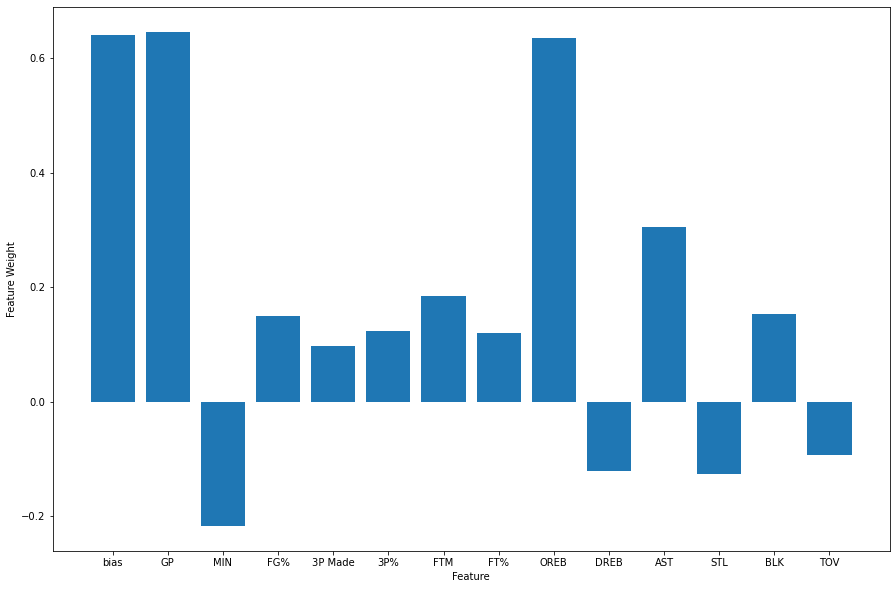

In [33]:
# create figure 
fig = plt.figure(figsize = (15, 10))

# get feature names and add 'bias' to the beginning of the list 
col_names = list(nba_new_X.columns)
col_names.insert(0, 'bias')

# plot bar plot of weights vs features 
plt.bar(x = range(0, len(log_reg_2.w)), height = np.squeeze(log_reg_2.w))

# set x and y label 
plt.xlabel('Feature')
plt.ylabel('Feature Weight')

# change x ticks to the feature names 
plt.xticks(ticks = range(0, len(log_reg_2.w)), labels = col_names)

# show figure 
plt.show()

We can see that the 'bias', 'GP', 'OREB', and 'AST' features contribute the most to the classification of the positive label. This makes sense because we expect players that play more games to have careers that are longer than 5 years. Offensive rebounds and assists are also highly desired in the NBA and thus they contribute to a player lasting more than 5 years. On the other hand, 'MIN' has a large negative feature weight. This also makes sense, because a player that plays more minutes is less likely to last a long time in the league. 


# **Part 3: Support Vector Machines**

In this part, we will be using a breast cancer dataset for classification. 

Given 30 continuous features describing the nuclei of cells in a digitized image of a fine needle aspirate (FNA) of a breast mass, we will train SVM models to classify each sample as benign (B) or malignant (M).

In [34]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
# Split data into features and labels
cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**The following pre-processing steps have been applied to the breast cancer dataset in the next cell:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [36]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [37]:
# create primal SVM model
primal_svm = LinearSVC()

# fit the model to the training set 
primal_svm.fit(cancer_X_train, cancer_y_train.reshape(cancer_y_train.shape[0], ))

# predict on the training, validation, and test sets 
cancer_y_pred_train_p = primal_svm.predict(cancer_X_train)
cancer_y_pred_val_p = primal_svm.predict(cancer_X_val)
cancer_y_pred_test_p = primal_svm.predict(cancer_X_test)

# calculate accuracy score on the training, validation, and test sets 
cancer_train_acc_p = accuracy_score(cancer_y_train, cancer_y_pred_train_p)
cancer_val_acc_p = accuracy_score(cancer_y_val, cancer_y_pred_val_p)
cancer_test_acc_p = accuracy_score(cancer_y_test, cancer_y_pred_test_p)

# print the accuracy scores 
print('For primal SVM:')
print('\t- The accuracy on the training set is:', cancer_train_acc_p)
print('\t- The accuracy on the validation set is:', cancer_val_acc_p)
print('\t- The accuracy on the test set is:', cancer_test_acc_p)

For primal SVM:
	- The accuracy on the training set is: 0.9912023460410557
	- The accuracy on the validation set is: 0.9298245614035088
	- The accuracy on the test set is: 0.9473684210526315


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [38]:
# create dual SVM model 
dual_svm = SVC()

# fit the model to the training data 
dual_svm.fit(cancer_X_train, cancer_y_train.reshape(cancer_y_train.shape[0], ))

# predict on the training, validation, and test sets 
cancer_y_pred_train_d = dual_svm.predict(cancer_X_train)
cancer_y_pred_val_d = dual_svm.predict(cancer_X_val)
cancer_y_pred_test_d = dual_svm.predict(cancer_X_test)

# calculate accuracy score on the training, validation, and test sets 
cancer_train_acc_d = accuracy_score(cancer_y_train, cancer_y_pred_train_d)
cancer_val_acc_d = accuracy_score(cancer_y_val, cancer_y_pred_val_d)
cancer_test_acc_d = accuracy_score(cancer_y_test, cancer_y_pred_test_d)

# print accuracy scores 
print('For dual SVM:')
print('\t- The accuracy on the training set is:', cancer_train_acc_d)
print('\t- The accuracy on the validation set is:', cancer_val_acc_d)
print('\t- The accuracy on the test set is:', cancer_test_acc_d)

For dual SVM:
	- The accuracy on the training set is: 0.9853372434017595
	- The accuracy on the validation set is: 0.9824561403508771
	- The accuracy on the test set is: 0.9736842105263158
